In [32]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import io
from datetime import datetime
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
#from dtaidistance import dtw
from sklearn.model_selection import train_test_split 
import timeit
from lightgbm import LGBMRegressor
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

import warnings
warnings.filterwarnings('ignore')

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Bostonpad_v4.csv to Bostonpad_v4 (3).csv


In [40]:
bostonPad =  pd.read_csv(io.BytesIO(uploaded['Bostonpad_v4.csv']))
bostonPad.head()

,Unnamed: 0,ad_id,create_date,date_modified,Zipcode,number bedrooms,baths,price,heat,style,luxury_building,pets,hot_water,electricity,extra_storage,parking,dish_washer,laundry_location,air_conditioning,furnished,status,feed_type,pets_description,LOCATION_TYPE
0,0,3833809,9/26/2017 0:00,12/6/2021 18:39,2120,4.0,3.0,5200,False,House,False,0,0.0,False,False,NaN,True,Unit,In Wall,NaN,Active,RENTAL,NO PETS,Non-university
1,1,3833806,6/6/2012 0:00,12/6/2021 18:38,2120,1.0,1.0,2200,False,House,False,0,0.0,False,False,DriveWay,False,Hook-Ups,NaN,No,Active,RENTAL,NO PETS,Non-university
2,2,3834528,4/26/2006 0:00,12/6/2021 18:37,2120,3.0,2.0,3600,False,House,False,0,0.0,False,False,Street,True,"Basement, Coin-Op",NaN,NaN,Active,RENTAL,NaN,Non-university
3,3,3833805,6/6/2012 0:00,12/6/2021 18:37,2120,3.0,2.0,3500,False,House,False,0,0.0,False,False,DriveWay,False,Unit,NaN,No,Active,RENTAL,NO PETS,Non-university
4,4,3833818,3/11/2020 14:13,12/6/2021 18:35,2135,3.0,1.0,3700,False,Apartment,True,0,0.0,False,False,NaN,False,NaN,NaN,NaN,Active,RENTAL,NaN,Non-university


In [41]:
cols_df = pd.DataFrame(bostonPad.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)#excluding target column of salary 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['Unnamed: 0', 'ad_id', 'Zipcode', 'price', 'pets']


Categorical variables includes 
 ['create_date', 'date_modified', 'heat', 'style', 'electricity', 'extra_storage', 'parking', 'dish_washer', 'laundry_location', 'air_conditioning', 'furnished', 'status', 'feed_type', 'pets_description', 'LOCATION_TYPE']


In [42]:
del bostonPad['Unnamed: 0']

In [43]:
bostonPad = bostonPad.apply(lambda x:x.fillna(x.value_counts().index[0]))

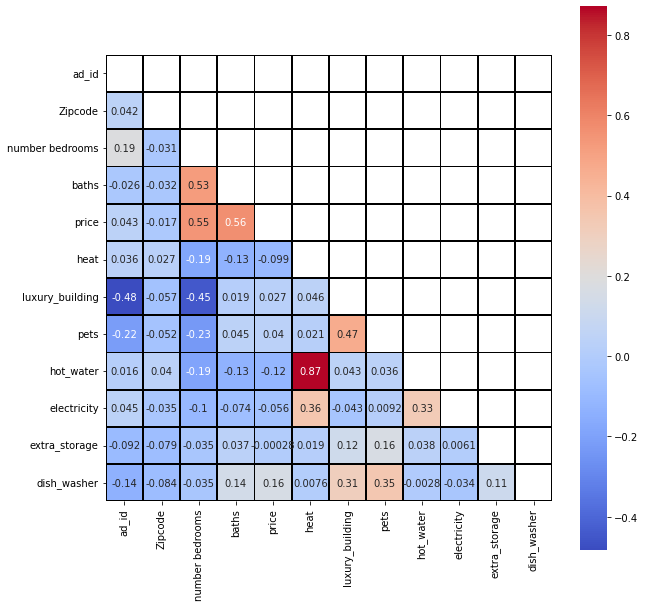

In [44]:
plt.figure(figsize=(10,10))
correlation = bostonPad.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation,cmap='coolwarm',square=True,linecolor='black',linewidths=1,
            mask=matrix,annot=True)
plt.show()

In [45]:
bostonPad.corr()

,ad_id,Zipcode,number bedrooms,baths,price,heat,luxury_building,pets,hot_water,electricity,extra_storage,dish_washer
ad_id,1.000000,0.042500,0.188401,-0.026096,0.043299,0.036443,-0.482868,-0.217794,0.015610,0.045316,-0.091604,-0.136442
Zipcode,0.042500,1.000000,-0.030715,-0.032080,-0.017403,0.027307,-0.056514,-0.052161,0.039580,-0.035154,-0.079476,-0.083934
number bedrooms,0.188401,-0.030715,1.000000,0.527329,0.545411,-0.185751,-0.445560,-0.232674,-0.191102,-0.102725,-0.034789,-0.034716
baths,-0.026096,-0.032080,0.527329,1.000000,0.564621,-0.129738,0.019416,0.045110,-0.130647,-0.074494,0.036785,0.138318
price,0.043299,-0.017403,0.545411,0.564621,1.000000,-0.098824,0.026900,0.040256,-0.115145,-0.055560,-0.000282,0.159731
heat,0.036443,0.027307,-0.185751,-0.129738,-0.098824,1.000000,0.045884,0.020801,0.871344,0.355202,0.018681,0.007607
luxury_building,-0.482868,-0.056514,-0.445560,0.019416,0.026900,0.045884,1.000000,0.467658,0.043074,-0.042611,0.124004,0.308934
pets,-0.217794,-0.052161,-0.232674,0.045110,0.040256,0.020801,0.467658,1.000000,0.035553,0.009238,0.163418,0.347897
hot_water,0.015610,0.039580,-0.191102,-0.130647,-0.115145,0.871344,0.043074,0.035553,1.000000,0.329626,0.038484,-0.002773
electricity,0.045316,-0.035154,-0.102725,-0.074494,-0.055560,0.355202,-0.042611,0.009238,0.329626,1.000000,0.006115,-0.033618
